<em>
  <strong>
    <font size="100">
      Reconstrucción de 3D a partir de 2D
    </font>
  </strong>
</em>


In [ ]:
%%javascript
  function ClickConnect() {
    var iconElement = document.getElementById("toggle-header-button");
    if (iconElement) {
    var clickEvent = new MouseEvent ("click", {
        bubbles: true, cancelable: true,
        view: window
      });
    iconElement.dispatchEvent (clickEvent);
    }
  }
  setInterval(ClickConnect, 6000);

<IPython.core.display.Javascript object>

In [ ]:
!echo "Reconstrucción de 3D a partir de 2D"

Reconstrucción de 3D a partir de 2D


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda config --set solver classic
!conda install -y -c conda-forge \
    cudatoolkit=11.6 \
    opencv \
    numpy \
    matplotlib \
    open3d \
    pillow \
    scipy \
    scikit-image \
    tqdm \
    joblib \
    ninja \
    pytorch=1.12.1 \
    torchaudio=0.12.1 \
    torchvision=0.13.1
!conda install -y -c pytorch -c conda-forge -c defaults \
    plyfile \
    pip=22.3.1

Error while loading conda entry point: conda-libmamba-solver (module 'libmambapy' has no attribute 'QueryFormat')
Error while loading conda entry point: conda-libmamba-solver (module 'libmambapy' has no attribute 'QueryFormat')
\ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [ ]:
import os
import cv2
import shutil
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import open3d as o3d
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Instalación de Dependencias***

In [ ]:
!sudo add-apt-repository -y universe
!sudo add-apt-repository -y multiverse
!sudo apt-get update

Adding component(s) 'universe' to all repositories.
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 384 kB in 2s (253 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to p

In [ ]:
!sudo apt-get update
!sudo apt-get install -y --no-install-recommends \
    build-essential \
    cmake \
    libboost-all-dev \
    libeigen3-dev \
    libflann-dev \
    libglew-dev \
    libgl1-mesa-dev \
    libglu1-mesa-dev \
    mesa-common-dev \
    libqt5opengl5-dev \
    qtbase5-dev \
    libqt5x11extras5-dev \
    libssl-dev \
    libmetis-dev \
    libfreeimage-dev \
    libopenmpi-dev \
    libyaml-cpp-dev \
    libcgal-dev \
    libceres-dev \
    libgflags-dev \
    libgoogle-glog-dev \
    libatlas-base-dev \
    libsuitesparse-dev \
    libtbb-dev \
    libxml2-dev \
    libxslt1-dev \
    zlib1g-dev \
    freeglut3-dev \
    git
!sudo apt-get install --reinstall -y libflann-dev
!wget https://www.graphics.rwth-aachen.de/media/openmesh_static/Releases/8.1/OpenMesh-8.1.tar.gz
!tar -xzf OpenMesh-8.1.tar.gz
%cd OpenMesh-8.1

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

# ***Gaussian Splatting***

In [ ]:
!git clone https://github.com/colmap/colmap.git

fatal: destination path 'colmap' already exists and is not an empty directory.


In [ ]:
!mkdir "/content/colmap/build"

mkdir: cannot create directory ‘/content/colmap/build’: File exists


In [ ]:
!cmake -DBUILD_CUDA=ON "/content/colmap/"

-- Enabling LSD support
-- Found FreeImage
--   Includes : /usr/include
--   Libraries : /usr/lib/x86_64-linux-gnu/libfreeimage.so
-- Found FLANN
--   Includes : /usr/include
--   Libraries : /usr/lib/x86_64-linux-gnu/libflann.so
-- Found LZ4
--   Includes : /usr/local/include
--   Libraries : /usr/local/lib/liblz4.so
-- Found Metis
--   Includes : /usr/include
--   Libraries : /usr/lib/x86_64-linux-gnu/libmetis.so
-- Found Glog
--   Target : glog::glog
-- Found Glew
--   Includes : /usr/local/include
--   Libraries : /usr/local/lib/libGLEW.so
-- Found required Ceres dependency: Eigen version 3.4.0 in /usr/local/include/eigen3
-- Found required Ceres dependency: glog
-- Found required Ceres dependency: gflags
-- Found Ceres version: 2.0.0 installed in: /usr with components: [EigenSparse, SparseLinearAlgebraLibrary, LAPACK, SuiteSparse, CXSparse, SchurSpecializations, Multithreading]
-- Enabling OpenMP support
-- Using header-only CGAL
-- Targetting Unix Makefiles
-- Using /usr/bin/c++ 

In [ ]:
!make -j$(nproc)

[  4%] Built target colmap_util
[ 18%] Built target colmap_vlfeat
[ 19%] Built target colmap_lsd
[ 20%] Built target colmap_util_cuda
[ 25%] Built target colmap_sift_gpu
[ 41%] Built target PoseLib
[ 44%] Built target colmap_poisson_recon
[ 44%] Built target colmap_feature_types
[ 48%] Built target colmap_math
[ 48%] Built target colmap_sensor
[ 50%] Built target colmap_optim
[ 53%] Built target colmap_geometry
[ 59%] Built target colmap_scene
[ 61%] Built target colmap_image
[ 65%] Built target colmap_mvs
[ 72%] Built target colmap_estimators
[ 74%] Built target colmap_retrieval
[ 76%] Built target colmap_mvs_cuda
[ 78%] Built target colmap_sfm
[ 81%] Built target colmap_feature
[ 85%] Built target colmap_controllers
[ 86%] Built target colmap_exe
[ 97%] Built target colmap_ui
[100%] Built target colmap_main


In [ ]:
!sudo make install

[ 16%] Built target PoseLib
[ 20%] Built target colmap_util
[ 20%] Built target colmap_feature_types
[ 22%] Built target colmap_math
[ 25%] Built target colmap_geometry
[ 39%] Built target colmap_vlfeat
[ 41%] Built target colmap_sensor
[ 47%] Built target colmap_scene
[ 48%] Built target colmap_lsd
[ 50%] Built target colmap_image
[ 52%] Built target colmap_optim
[ 53%] Built target colmap_util_cuda
[ 60%] Built target colmap_estimators
[ 62%] Built target colmap_retrieval
[ 67%] Built target colmap_sift_gpu
[ 70%] Built target colmap_feature
[ 73%] Built target colmap_poisson_recon
[ 77%] Built target colmap_mvs
[ 79%] Built target colmap_sfm
[ 83%] Built target colmap_controllers
[ 84%] Built target colmap_exe
[ 86%] Built target colmap_mvs_cuda
[ 97%] Built target colmap_ui
[100%] Built target colmap_main
Install the project...
-- Install configuration: "Release"
-- Up-to-date: /usr/local/share/applications/COLMAP.desktop
-- Up-to-date: /usr/local/lib/libcolmap_controllers.a
-- Up-

In [ ]:
!git clone https://github.com/graphdeco-inria/gaussian-splatting --recursive
!git -C "gaussian-splatting" submodule update --init --recursive

fatal: destination path 'gaussian-splatting' already exists and is not an empty directory.


In [ ]:
INPUT_PATH = "/content/drive/MyDrive/SIS421/Examen Final - SIS421/Dataset" # @param {type:"string"}


In [ ]:
OUTPUT_COLMAP = "/content/drive/MyDrive/SIS421/Examen Final - SIS421/COLMAP"  # @param {type:"string"}

In [ ]:
OUTPUT_GAUSSIAN = "/content/drive/MyDrive/SIS421/Examen Final - SIS421/GaussianSplatting"  # @param {type:"string"}

In [ ]:
ITERATIONS = 27743  # @param {type:"slider", min:1, max:100000, step:1}

In [ ]:
INPUT_PATH_ABS = os.path.abspath(INPUT_PATH)
OUTPUT_COLMAP_ABS = os.path.abspath(OUTPUT_COLMAP)
OUTPUT_GAUSSIAN_ABS = os.path.abspath(OUTPUT_GAUSSIAN)

In [ ]:
os.makedirs(OUTPUT_COLMAP, exist_ok=True)
os.makedirs(os.path.join(OUTPUT_COLMAP, 'images'), exist_ok=True)
video_extensiones = ['.mp4', '.avi', '.mov']
if os.path.isfile(INPUT_PATH) and Path(INPUT_PATH).suffix.lower() in video_extensiones:
    print("Procesando video...")
    cap = cv2.VideoCapture(INPUT_PATH)
    if not cap.isOpened():
        raise IOError(f"No se pudo abrir el video: {INPUT_PATH}")
    frame_count = 0
    image_idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % 30 == 0:
            image_path = os.path.join(OUTPUT_COLMAP, 'images', f'frame_{image_idx:04d}.jpg')
            cv2.imwrite(image_path, frame)
            image_idx += 1
        frame_count += 1
    cap.release()
    print(f"Se extrajeron {image_idx} imágenes del video.")
elif os.path.isdir(INPUT_PATH):
    print("Usando directorio de imágenes...")
    for img_file in os.listdir(INPUT_PATH):
        full_file_name = os.path.join(INPUT_PATH, img_file)
        if os.path.isfile(full_file_name) and img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy(full_file_name, os.path.join(OUTPUT_COLMAP, 'images'))
else:
    raise ValueError("La ruta de entrada debe ser un video o un directorio de imágenes")

Usando directorio de imágenes...


In [ ]:
images_dir = os.path.join(OUTPUT_COLMAP, 'images')
if not os.listdir(images_dir):
    raise ValueError(f"No se encontraron imágenes en: {images_dir}")
sparse_dir = os.path.join(OUTPUT_COLMAP, 'sparse')
dense_dir = os.path.join(OUTPUT_COLMAP, 'dense')
os.makedirs(sparse_dir, exist_ok=True)
os.makedirs(dense_dir, exist_ok=True)
database_path = os.path.join(OUTPUT_COLMAP, 'database.db')
if os.path.exists(database_path):
    os.remove(database_path)

In [ ]:
print("Ejecutando COLMAP Feature Extractor...")
!colmap feature_extractor \
    --database_path "{database_path}" \
    --image_path "{images_dir}" \
    --ImageReader.single_camera 1 \
    --SiftExtraction.max_image_size 4096

Ejecutando COLMAP Feature Extractor...
I1130 01:14:47.510672 78856 misc.cc:44] 
Feature extraction
I1130 01:14:47.511461 78859 sift.cc:721] Creating SIFT GPU feature extractor
I1130 01:14:50.899885 78860 feature_extraction.cc:258] Processed file [1/337]
I1130 01:14:50.899931 78860 feature_extraction.cc:261]   Name:            frame_0_Azucena_3D.mp4.jpg
I1130 01:14:50.899940 78860 feature_extraction.cc:270]   Dimensions:      720 x 1280
I1130 01:14:50.899948 78860 feature_extraction.cc:273]   Camera:          #1 - SIMPLE_RADIAL
I1130 01:14:50.899958 78860 feature_extraction.cc:276]   Focal Length:    1536.00px
I1130 01:14:50.899973 78860 feature_extraction.cc:280]   Features:        1440
I1130 01:14:50.928236 78860 feature_extraction.cc:258] Processed file [2/337]
I1130 01:14:50.928269 78860 feature_extraction.cc:261]   Name:            frame_100_Azucena_3D.mp4.jpg
I1130 01:14:50.928278 78860 feature_extraction.cc:270]   Dimensions:      720 x 1280
I1130 01:14:50.928287 78860 feature_ex

In [ ]:
print("Ejecutando COLMAP Exhaustive Matcher...")
!colmap exhaustive_matcher \
    --database_path "{database_path}"

Ejecutando COLMAP Exhaustive Matcher...
I1130 01:15:01.891042 78936 misc.cc:44] 
Feature matching
I1130 01:15:01.902607 78937 sift.cc:1426] Creating SIFT GPU feature matcher
I1130 01:15:01.979004 78936 pairing.cc:168] Generating exhaustive image pairs...
I1130 01:15:01.979034 78936 pairing.cc:201] Matching block [1/7, 1/7]
I1130 01:15:02.613662 78936 feature_matching.cc:46] in 0.635s
I1130 01:15:02.631006 78936 pairing.cc:201] Matching block [1/7, 2/7]
I1130 01:15:02.880893 78936 feature_matching.cc:46] in 0.250s
I1130 01:15:02.895617 78936 pairing.cc:201] Matching block [1/7, 3/7]
I1130 01:15:03.096032 78936 feature_matching.cc:46] in 0.200s
I1130 01:15:03.116537 78936 pairing.cc:201] Matching block [1/7, 4/7]
I1130 01:15:03.326531 78936 feature_matching.cc:46] in 0.210s
I1130 01:15:03.352203 78936 pairing.cc:201] Matching block [1/7, 5/7]
I1130 01:15:03.540177 78936 feature_matching.cc:46] in 0.188s
I1130 01:15:03.554598 78936 pairing.cc:201] Matching block [1/7, 6/7]
I1130 01:15:03.

In [ ]:
print("Ejecutando COLMAP Mapper...")
!colmap mapper \
    --database_path "{database_path}" \
    --image_path "{images_dir}" \
    --output_path "{sparse_dir}"
sparse_reconstruction = os.path.join(sparse_dir, '0')
if not os.path.exists(sparse_reconstruction):
    raise ValueError("No se generó la reconstrucción esparsa. Verifica que las imágenes tengan suficientes características coincidentes.")

Ejecutando COLMAP Mapper...
I1130 01:15:27.713163 79053 incremental_pipeline.cc:237] Loading database
I1130 01:15:27.827919 79053 database_cache.cc:66] Loading cameras...
I1130 01:15:27.827992 79053 database_cache.cc:76]  1 in 0.000s
I1130 01:15:27.828117 79053 database_cache.cc:84] Loading matches...
I1130 01:15:27.888062 79053 database_cache.cc:89]  4098 in 0.060s
I1130 01:15:27.888103 79053 database_cache.cc:105] Loading images...
I1130 01:15:27.970373 79053 database_cache.cc:153]  337 in 0.082s (connected 336)
I1130 01:15:27.970429 79053 database_cache.cc:164] Loading pose priors...
I1130 01:15:27.971616 79053 database_cache.cc:175]  0 in 0.001s
I1130 01:15:27.971635 79053 database_cache.cc:184] Building correspondence graph...
I1130 01:15:28.051868 79053 database_cache.cc:210]  in 0.080s (ignored 0)
I1130 01:15:28.052728 79053 timer.cc:91] Elapsed time: 0.004 [minutes]
I1130 01:15:28.077378 79053 incremental_pipeline.cc:282] Finding good initial image pair
I1130 01:15:33.389261 79

In [ ]:
print("Ejecutando COLMAP Image Undistorter...")
!colmap image_undistorter \
    --image_path "{images_dir}" \
    --input_path "{sparse_reconstruction}" \
    --output_path "{dense_dir}" \
    --output_type COLMAP \
    --max_image_size 2000

Ejecutando COLMAP Image Undistorter...
I1130 01:16:48.295192 79410 misc.cc:44] 
Reading reconstruction
I1130 01:16:48.341560 79410 image.cc:347] => Reconstruction with 94 images and 5432 points
I1130 01:16:48.341603 79410 misc.cc:44] 
Image undistortion
I1130 01:16:48.359714 79410 undistortion.cc:215] Undistorting image [1/94]
I1130 01:16:48.677361 79410 undistortion.cc:215] Undistorting image [2/94]
I1130 01:16:48.697502 79410 undistortion.cc:215] Undistorting image [3/94]
I1130 01:16:49.031363 79410 undistortion.cc:215] Undistorting image [4/94]
I1130 01:16:49.031397 79410 undistortion.cc:215] Undistorting image [5/94]
I1130 01:16:49.340766 79410 undistortion.cc:215] Undistorting image [6/94]
I1130 01:16:49.340807 79410 undistortion.cc:215] Undistorting image [7/94]
I1130 01:16:49.653035 79410 undistortion.cc:215] Undistorting image [8/94]
I1130 01:16:49.658442 79410 undistortion.cc:215] Undistorting image [9/94]
I1130 01:16:49.983996 79410 undistortion.cc:215] Undistorting image [10

In [ ]:
converted_model_path = os.path.join(OUTPUT_COLMAP, 'converted_model/points3d.ply')
print("Convirtiendo el modelo de BIN a PLY...")
!colmap model_converter \
    --input_path "{sparse_reconstruction}" \
    --output_path "{converted_model_path}" \
    --output_type PLY

Convirtiendo el modelo de BIN a PLY...


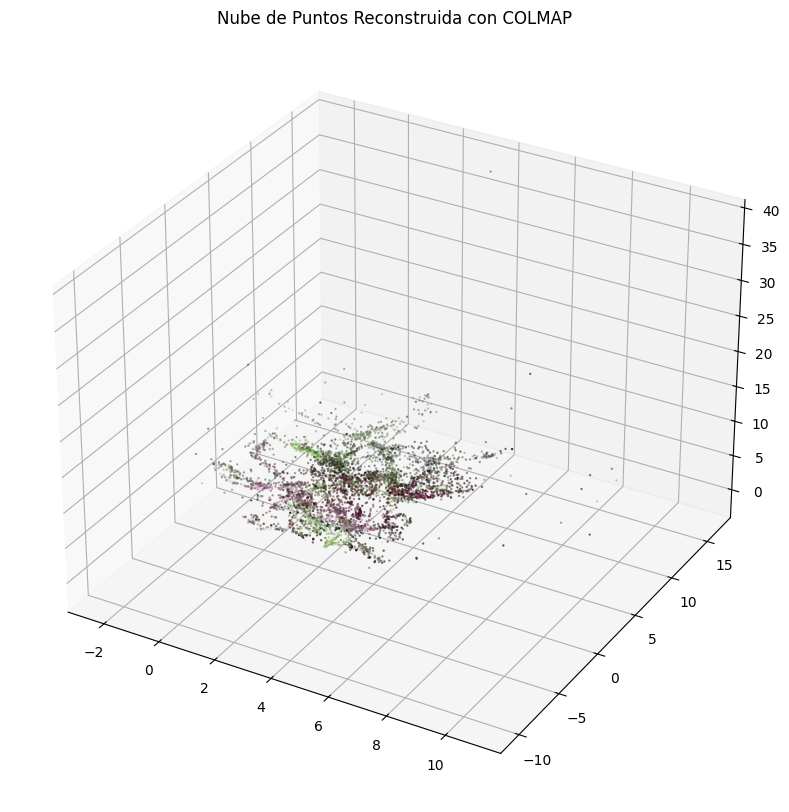

In [ ]:
pcd = o3d.io.read_point_cloud(converted_model_path)
points = np.asarray(pcd.points)
colors = np.asarray(pcd.colors)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, s=0.5)
plt.title('Nube de Puntos Reconstruida con COLMAP')
plt.show()

In [ ]:
!conda install torch

Solving environment: - unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: / unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - torch

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [ ]:
!conda run -n gaussian_splatting pip install /content/gaussian-splatting/submodules/diff-gaussian-rasterization
!conda run -n gaussian_splatting pip install /content/gaussian-splatting/submodules/simple-knn
!conda run -n gaussian_splatting pip install /content/gaussian-splatting/submodules/fused-ssim


EnvironmentLocationNotFound: Not a conda environment: /usr/local/envs/gaussian_splatting


EnvironmentLocationNotFound: Not a conda environment: /usr/local/envs/gaussian_splatting


EnvironmentLocationNotFound: Not a conda environment: /usr/local/envs/gaussian_splatting



In [ ]:
%cd /content/gaussian-splatting/submodules/diff-gaussian-rasterization
!python setup.py build_ext --inplace

/content/gaussian-splatting/submodules/diff-gaussian-rasterization
Traceback (most recent call last):
  File "/content/gaussian-splatting/submodules/diff-gaussian-rasterization/setup.py", line 13, in <module>
    from torch.utils.cpp_extension import CUDAExtension, BuildExtension
ModuleNotFoundError: No module named 'torch'


In [ ]:
!python "/content/gaussian-splatting/train.py" \
        -s "{converted_model_path}" \
        -m "{OUTPUT_GAUSSIAN}" \
        --iterations {ITERATIONS}

Traceback (most recent call last):
  File "/content/gaussian-splatting/train.py", line 13, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'


In [ ]:
gs_pcd_path = os.path.join(OUTPUT_GAUSSIAN, f'point_cloud/iteration_{ITERATIONS}/point_cloud.ply')
if os.path.exists(gs_pcd_path):
    print("Visualizando el resultado de Gaussian Splatting...")
    pcd = o3d.io.read_point_cloud(gs_pcd_path)
    points = np.asarray(pcd.points)
    colors = np.asarray(pcd.colors)
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, s=0.5)
    plt.title('Escenario Gaussian Splatting')
    plt.show()
else:
    print(f"No se encontró el archivo de puntos Gaussian Splatting: {gs_pcd_path}")

No se encontró el archivo de puntos Gaussian Splatting: /content/drive/MyDrive/SIS421/Examen Final - SIS421/GaussianSplatting/point_cloud/iteration_27743/point_cloud.ply


# ***NeRF***

In [ ]:
!git clone https://github.com/yenchenlin/nerf-pytorch.git

In [ ]:
!wget https://raw.githubusercontent.com/NVlabs/instant-ngp/master/scripts/colmap2nerf.py

In [ ]:
DATASET_NAME = 'Azucena' # @param {type:"string"}

# ***MiDaS***